# M² Real Examples

**Scott Prahl**

**Sept 2023**

This notebook demonstrates what happens when the ISO 11146 guidelines are violated.

In [1]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import laserbeamsize as lbs

pixel_size = 3.75e-6  # pixel size in microns
pixel_size_mm = pixel_size * 1e3
pixel_size_µm = pixel_size * 1e6

repo = "https://github.com/scottprahl/laserbeamsize/raw/main/docs/"

## A simple example from images to M²

Here is an analysis of a set of images that were insufficient for ISO 11146.

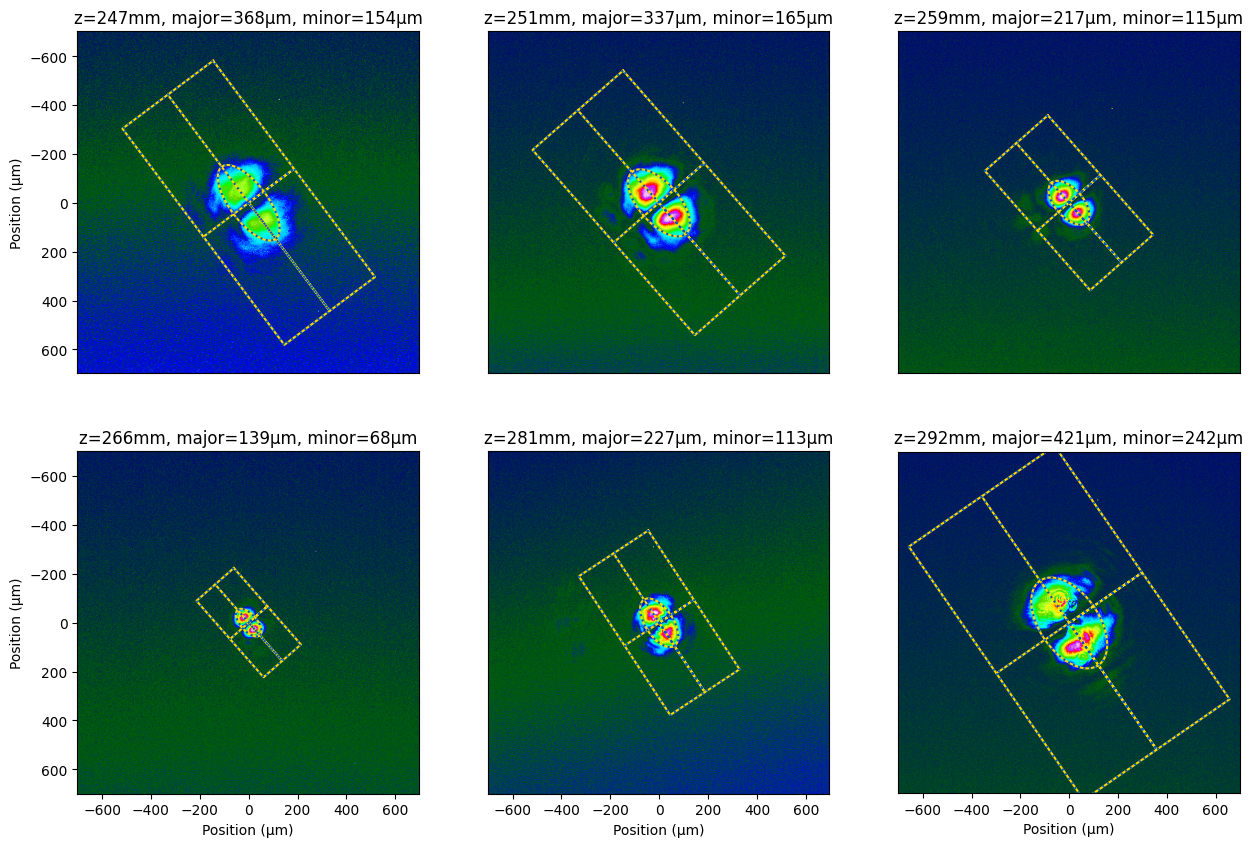

In [2]:
lambda0 = 632.8e-9  # meters
z10 = np.array([247, 251, 259, 266, 281, 292]) * 1e-3  # image location in meters
filenames = [repo + "sb_%.0fmm_10.pgm" % (number * 1e3) for number in z10]

# the 12-bit pixel images are stored in high-order bits in 16-bit values
tem10 = [iio.imread(name) >> 4 for name in filenames]

# remove top to eliminate artifact
for i in range(len(z10)):
    tem10[i] = tem10[i][200:, :]

# find beam in all the images and create arrays of beam diameters
options = {
    "pixel_size": 3.75,
    "units": "µm",
    "crop": [1400, 1400],
    "z": z10,
    "iso_noise": False,
}
d_minor, d_major = lbs.plot_image_montage(tem10, **options)  # d_minor and d_major in microns
plt.show()

Here is one way to plot the fit using the above diameters::

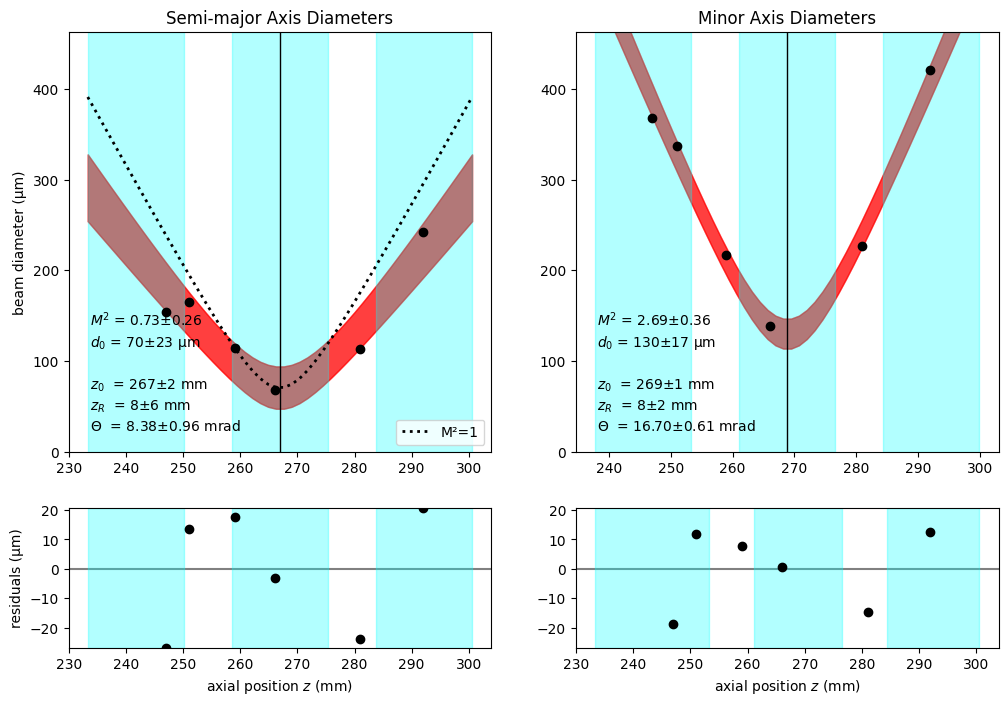

In [3]:
lbs.M2_diameter_plot(z10, d_major * 1e-6, lambda0, d_minor=d_minor * 1e-6)
plt.show()

In the graph above for the semi-minor axis, the dashed line shows the expected divergence
of a pure gaussian beam.  Since real beams should diverge faster than this (not slower)
there is some problem with the measurements (too few!).  On the other hand, the M² value 
the semi-major axis 2.6±0.7 is consistent with the expected value of 3 for the TEM₁₀ mode.

## Images on only one side of focus

This time images were only collected on one side of the focus.  The results show that the center was not located properly because M² < 1!

Beam propagation parameters
       M^2 = 0.42 ± 0.06

       d_0 = 363 ± 19 µm
       w_0 = 182 ± 9 µm

       z_0 = 705 ± 66 mm
       z_R = 387 ± 69 mm

     Theta = 0.94 ± 0.13 mrad

       BPP = 0.09 ± 0.01 mm mrad



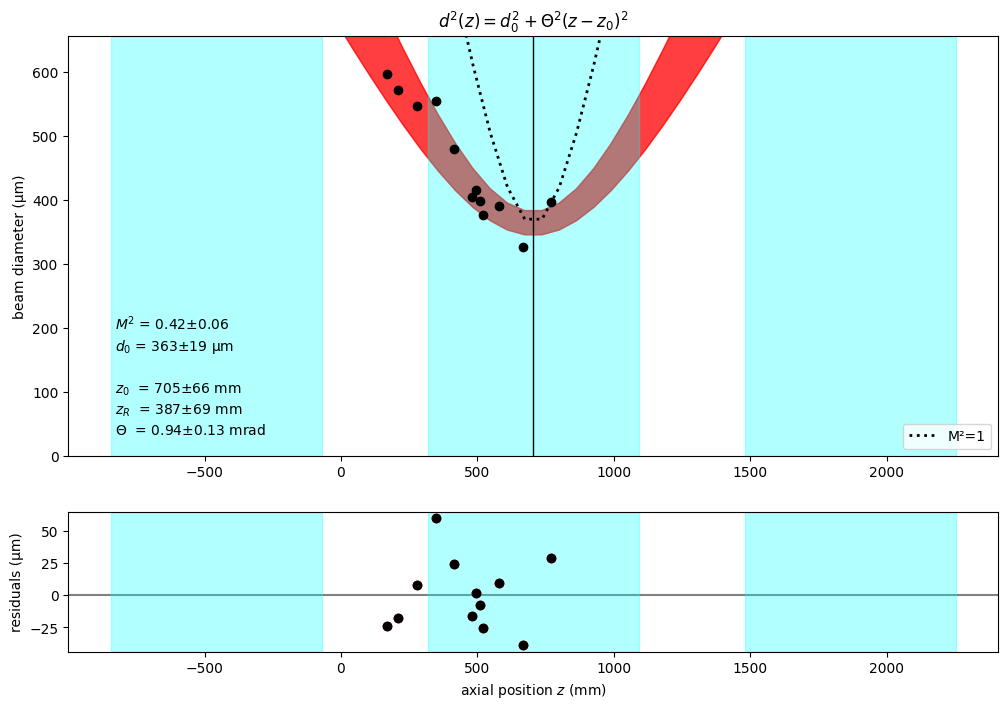

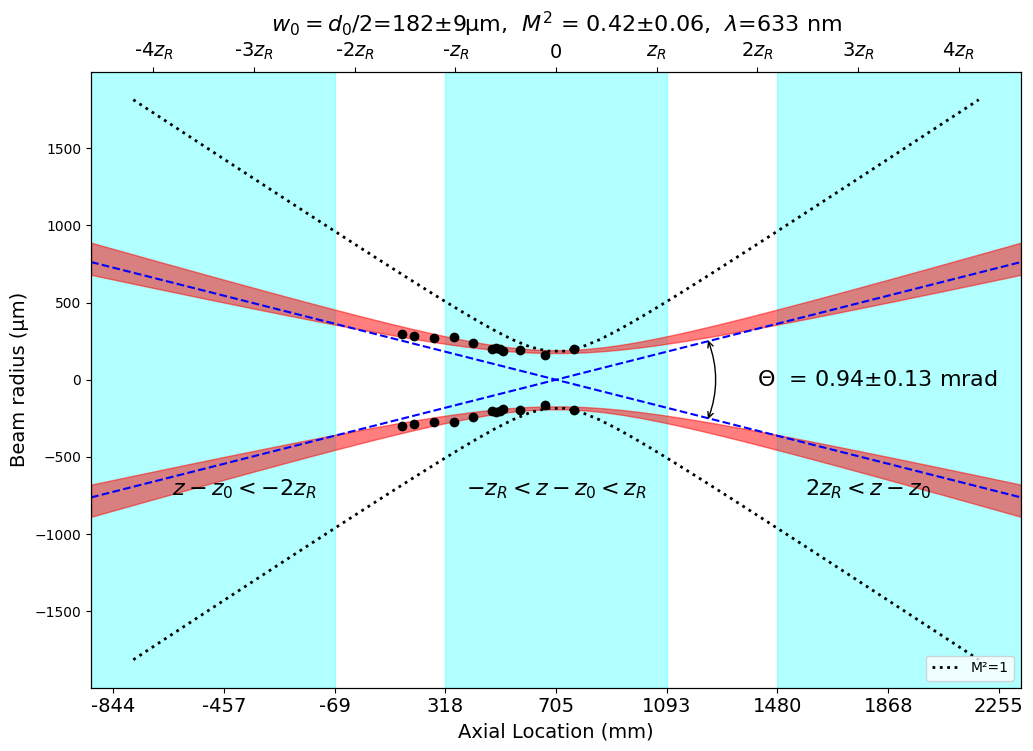

In [4]:
## Some Examples
f = 100e-3  # m
lambda6 = 632.8e-9  # m
z6 = np.array([168, 210, 280, 348, 414, 480, 495, 510, 520, 580, 666, 770]) * 1e-3
d6 = np.array([597, 572, 547, 554, 479, 404, 415, 399, 377, 391, 326, 397]) * 1e-6

print(lbs.M2_report(z6, d6, lambda6))

lbs.M2_diameter_plot(z6, d6, lambda6)
plt.show()

lbs.M2_radius_plot(z6, d6, lambda6)
plt.show()

## Too many images near focus (1)

The standard requires half the points near the focus and half the points more than two Rayleigh distances away.  This was not done for this set of data.

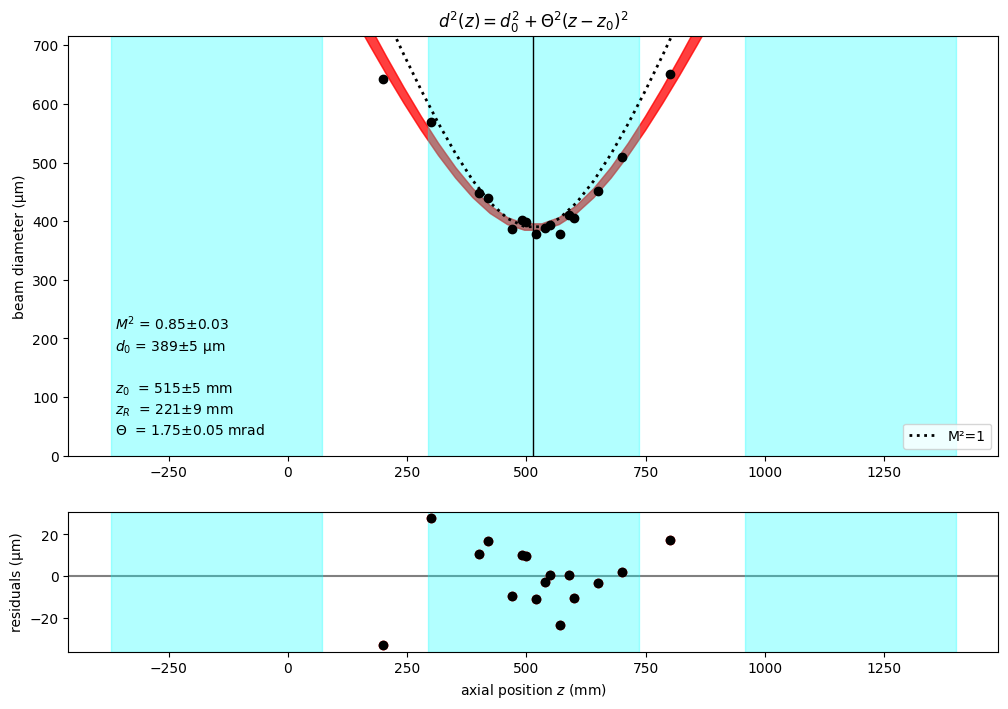

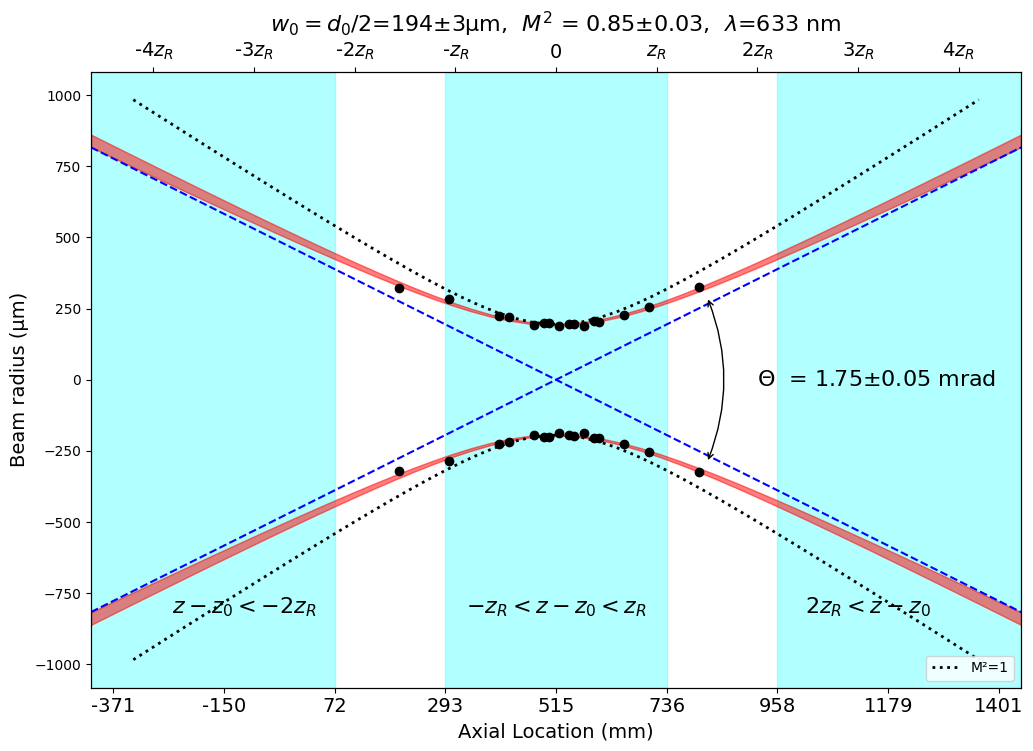

In [5]:
lambda7 = 632.8e-9
z7 = np.array([200, 300, 400, 420, 470, 490, 500, 520, 540, 550, 570, 590, 600, 650, 700, 800]) * 1e-3
d7 = (
    np.array(
        [
            0.64199014,
            0.56911747,
            0.44826505,
            0.43933241,
            0.38702287,
            0.40124416,
            0.39901968,
            0.37773683,
            0.38849226,
            0.39409733,
            0.37727374,
            0.41093666,
            0.40613024,
            0.45203464,
            0.5085964,
            0.65115378,
        ]
    )
    * 1e-3
)

lbs.M2_diameter_plot(z7, d7, lambda7)
plt.show()

lbs.M2_radius_plot(z7, d7, lambda7)
plt.show()

## Too many images near focus (2)

The standard requires half the points near the focus and half the points more than two Rayleigh distances away.  This was not done for this set of data.

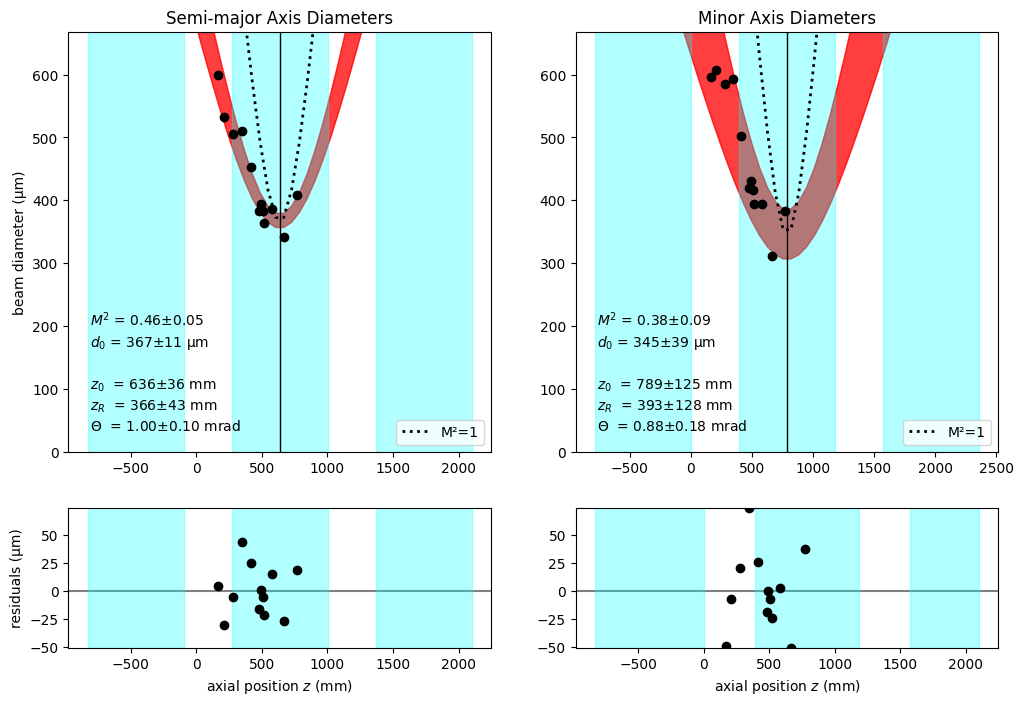

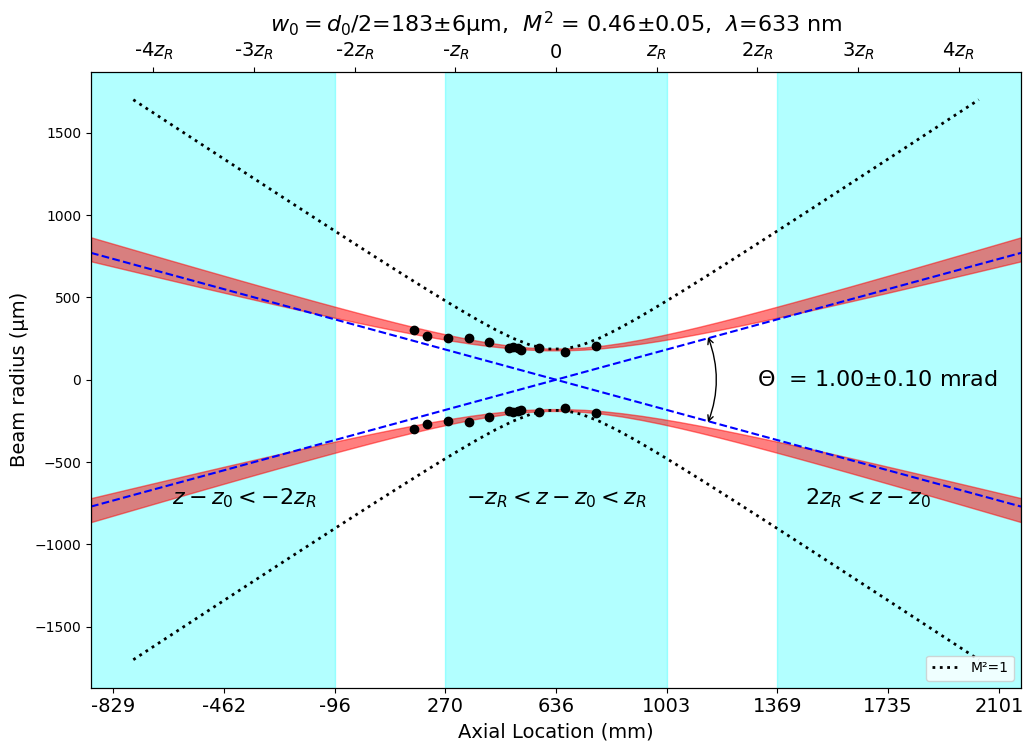

In [6]:
lambda8 = 633e-9  # m
z8 = np.array([168, 210, 280, 348, 414, 480, 495, 510, 520, 580, 666, 770]) * 1e-3
d_major_8 = np.array([160, 142, 135, 136, 121, 102, 105, 102, 97, 103, 91, 109]) * pixel_size
d_minor_8 = np.array([159, 162, 156, 158, 134, 112, 115, 111, 105, 105, 83, 102]) * pixel_size

phi8 = np.array(
    [
        0.72030965,
        0.60364794,
        0.41548236,
        0.48140986,
        0.36119897,
        0.0289199,
        0.568598,
        -0.0810475,
        -0.13710729,
        -0.43326888,
        -0.02038848,
        0.38256955,
    ]
)

lbs.M2_diameter_plot(z8, d_major_8, lambda8, d_minor=d_minor_8)
plt.show()

lbs.M2_radius_plot(z8, d_major_8, lambda8)
plt.show()

In [7]:
s = lbs.M2_report(z8, d_major_8, lambda8, d_minor=d_minor_8, f=100e-3)
print(s)

Beam propagation parameters derived from hyperbolic fit
Beam Propagation Ratio of the focused beam
        M2 = 0.41 ± 0.10
       M2x = 0.46 ± 0.05
       M2y = 0.38 ± 0.09
Beam waist diameter of the focused beam
        d0 = 356 ± 41 µm
       d0x = 367 ± 11 µm
       d0y = 345 ± 39 µm
Beam waist location of the focused beam
        z0 = 713 ± 130 mm
       z0x = 636 ± 36 mm
       z0y = 789 ± 125 mm
Rayleigh Length of the focused beam
        zR = 380 ± 135 mm
       zRx = 366 ± 43 mm
       zRy = 393 ± 128 mm
Divergence Angle of the focused beam
     theta = 0.94 ± 0.20 milliradians
   theta_x = 1.00 ± 0.10 milliradians
   theta_y = 0.88 ± 0.18 milliradians
Beam parameter product of the focused beam
       BPP = 0.08 ± 0.02 mm * mrad
     BPP_x = 0.09 ± 0.01 mm * mrad
     BPP_y = 0.08 ± 0.02 mm * mrad



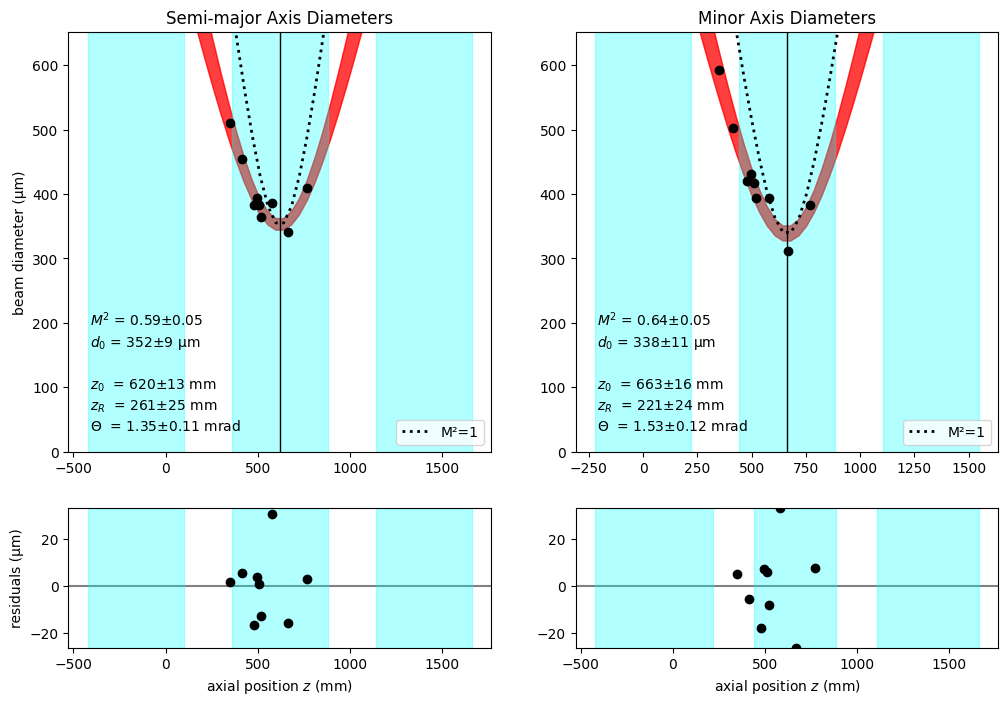

In [8]:
lbs.M2_diameter_plot(z8[3:], d_major_8[3:], lambda8, d_minor=d_minor_8[3:])

## Too many images near focus (3)

The standard requires half the points near the focus and half the points more than two Rayleigh distances away.  This was not done for this set of data.

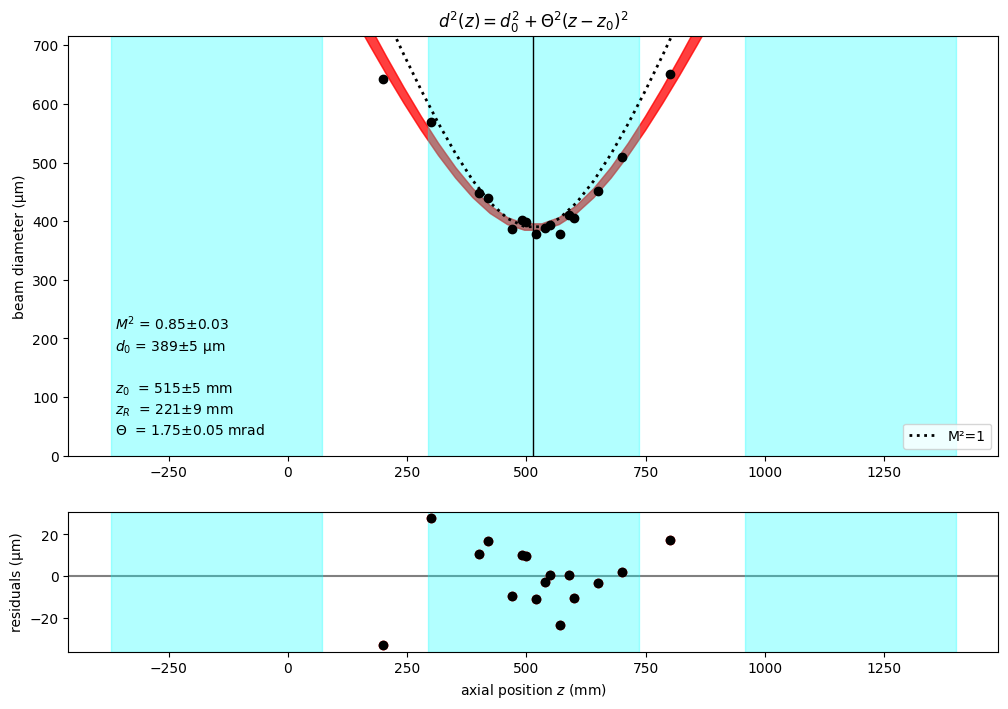

In [9]:
lambda2 = 632.8e-9

# array of distances at which images were collected
z2 = np.array(
    [200, 300, 400, 420, 470, 490, 500, 520, 540, 550, 570, 590, 600, 650, 700, 800],
    dtype=float,
)  # mm
d2 = np.array(
    [
        0.64199014,
        0.56911747,
        0.44826505,
        0.43933241,
        0.38702287,
        0.40124416,
        0.39901968,
        0.37773683,
        0.38849226,
        0.39409733,
        0.37727374,
        0.41093666,
        0.40613024,
        0.45203464,
        0.5085964,
        0.65115378,
    ]
)

z2 *= 1e-3
d2 *= 1e-3

lbs.M2_diameter_plot(z2, d2, lambda2)